In [21]:
import scipy.io.wavfile as wav
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
#training signal
dry_sample_rate, dry_signal = wav.read("DI.wav")
#target signal
wet_sample_rate, wet_signal = wav.read("wet.wav")

/Users/luckysonkhaidem/anaconda2/lib/python2.7/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [3]:
#sample rate is 44100 hz
print "Dry Signal Sample Rate: {}hz".format(dry_sample_rate)
print "Wet Signal Sample Rate: {}hz".format(wet_sample_rate)

Dry Signal Sample Rate: 44100hz
Wet Signal Sample Rate: 44100hz


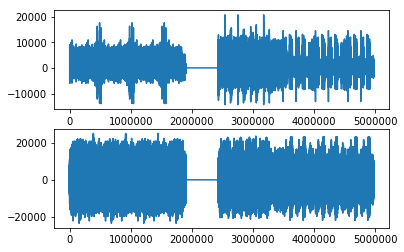

In [10]:
time_steps = range(len(dry_signal))
plt.subplot(2,1,1)
plt.plot(time_steps, dry_signal, label = "Dry Signal")
plt.subplot(2,1,2)
plt.plot(time_steps, wet_signal, label = "Wet Signal")
plt.show()

In [86]:
polynomial_encoder = PolynomialFeatures(1)
X = polynomial_encoder.fit_transform(dry_signal.reshape((-1,1)))

In [87]:
X

array([[1.000e+00, 9.035e+03],
       [1.000e+00, 8.636e+03],
       [1.000e+00, 8.110e+03],
       ...,
       [1.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00]])

In [88]:
train_len = int(len(X)*0.7)
x_train, x_test = X[:train_len], X[train_len:]
y_train, y_test = wet_signal[:train_len], wet_signal[train_len:]

In [89]:
model = LinearRegression(normalize = True)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [90]:
y_pred = model.predict(x_test)

In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
mse = mean_squared_error(y_pred, y_test)

In [93]:
print mse

28755055.128086723


In [94]:
learned_signal = model.predict(X)

In [95]:
wav.write("new.wav",dry_sample_rate, learned_signal)

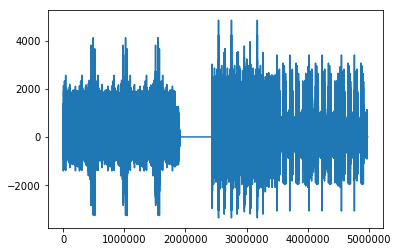

In [96]:
plt.plot(time_steps, learned_signal)
plt.show()